In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from fractions import Fraction
from empiricaldist import Pmf
import matplotlib.pyplot as plt

In [3]:
hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)

In [25]:
def update_train(pmf, data):
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [26]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

In [27]:
posterior.idxmax()

60

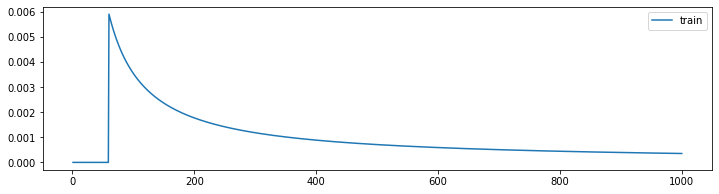

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(posterior, label='train')
plt.legend()
plt.show()

In [14]:
posterior.mean()

333.41989326370776